# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

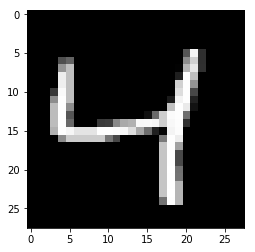

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [4]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32

image_size = mnist.train.images.shape[1]

inputs_ = tf.placeholder(tf.float32, (None, image_size), name='inputs')
targets_ = tf.placeholder(tf.float32, (None, image_size), name='targets')

# Output of hidden layer
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits
logits = tf.layers.dense(encoded, image_size, activation=None)
# Sigmoid output from
decoded = tf.nn.sigmoid(logits, name='output')

loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
cost = tf.reduce_mean(loss)
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

## Training

In [5]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss and the test loss afterwards. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [6]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6946
Epoch: 1/20... Training loss: 0.6911
Epoch: 1/20... Training loss: 0.6877
Epoch: 1/20... Training loss: 0.6840
Epoch: 1/20... Training loss: 0.6796
Epoch: 1/20... Training loss: 0.6740
Epoch: 1/20... Training loss: 0.6674
Epoch: 1/20... Training loss: 0.6601
Epoch: 1/20... Training loss: 0.6506
Epoch: 1/20... Training loss: 0.6409
Epoch: 1/20... Training loss: 0.6286
Epoch: 1/20... Training loss: 0.6162
Epoch: 1/20... Training loss: 0.6019
Epoch: 1/20... Training loss: 0.5855
Epoch: 1/20... Training loss: 0.5694
Epoch: 1/20... Training loss: 0.5531
Epoch: 1/20... Training loss: 0.5388
Epoch: 1/20... Training loss: 0.5197
Epoch: 1/20... Training loss: 0.5027
Epoch: 1/20... Training loss: 0.4868
Epoch: 1/20... Training loss: 0.4685
Epoch: 1/20... Training loss: 0.4498
Epoch: 1/20... Training loss: 0.4310
Epoch: 1/20... Training loss: 0.4209
Epoch: 1/20... Training loss: 0.4104
Epoch: 1/20... Training loss: 0.3931
Epoch: 1/20... Training loss: 0.3791
E

Epoch: 1/20... Training loss: 0.1916
Epoch: 1/20... Training loss: 0.1905
Epoch: 1/20... Training loss: 0.1928
Epoch: 1/20... Training loss: 0.1906
Epoch: 1/20... Training loss: 0.1869
Epoch: 1/20... Training loss: 0.1915
Epoch: 1/20... Training loss: 0.1893
Epoch: 1/20... Training loss: 0.1842
Epoch: 1/20... Training loss: 0.1943
Epoch: 1/20... Training loss: 0.1921
Epoch: 1/20... Training loss: 0.1901
Epoch: 1/20... Training loss: 0.1904
Epoch: 1/20... Training loss: 0.1928
Epoch: 1/20... Training loss: 0.1806
Epoch: 1/20... Training loss: 0.1872
Epoch: 1/20... Training loss: 0.1849
Epoch: 1/20... Training loss: 0.1849
Epoch: 1/20... Training loss: 0.1882
Epoch: 1/20... Training loss: 0.1870
Epoch: 1/20... Training loss: 0.1876
Epoch: 1/20... Training loss: 0.1841
Epoch: 1/20... Training loss: 0.1847
Epoch: 1/20... Training loss: 0.1871
Epoch: 1/20... Training loss: 0.1777
Epoch: 1/20... Training loss: 0.1907
Epoch: 1/20... Training loss: 0.1836
Epoch: 1/20... Training loss: 0.1812
E

Epoch: 2/20... Training loss: 0.1536
Epoch: 2/20... Training loss: 0.1583
Epoch: 2/20... Training loss: 0.1563
Epoch: 2/20... Training loss: 0.1532
Epoch: 2/20... Training loss: 0.1587
Epoch: 2/20... Training loss: 0.1589
Epoch: 2/20... Training loss: 0.1581
Epoch: 2/20... Training loss: 0.1500
Epoch: 2/20... Training loss: 0.1565
Epoch: 2/20... Training loss: 0.1578
Epoch: 2/20... Training loss: 0.1572
Epoch: 2/20... Training loss: 0.1534
Epoch: 2/20... Training loss: 0.1559
Epoch: 2/20... Training loss: 0.1595
Epoch: 2/20... Training loss: 0.1500
Epoch: 2/20... Training loss: 0.1503
Epoch: 2/20... Training loss: 0.1531
Epoch: 2/20... Training loss: 0.1562
Epoch: 2/20... Training loss: 0.1497
Epoch: 2/20... Training loss: 0.1489
Epoch: 2/20... Training loss: 0.1550
Epoch: 2/20... Training loss: 0.1540
Epoch: 2/20... Training loss: 0.1506
Epoch: 2/20... Training loss: 0.1467
Epoch: 2/20... Training loss: 0.1517
Epoch: 2/20... Training loss: 0.1552
Epoch: 2/20... Training loss: 0.1592
E

Epoch: 3/20... Training loss: 0.1399
Epoch: 3/20... Training loss: 0.1336
Epoch: 3/20... Training loss: 0.1364
Epoch: 3/20... Training loss: 0.1357
Epoch: 3/20... Training loss: 0.1343
Epoch: 3/20... Training loss: 0.1366
Epoch: 3/20... Training loss: 0.1385
Epoch: 3/20... Training loss: 0.1384
Epoch: 3/20... Training loss: 0.1359
Epoch: 3/20... Training loss: 0.1388
Epoch: 3/20... Training loss: 0.1379
Epoch: 3/20... Training loss: 0.1387
Epoch: 3/20... Training loss: 0.1359
Epoch: 3/20... Training loss: 0.1323
Epoch: 3/20... Training loss: 0.1331
Epoch: 3/20... Training loss: 0.1380
Epoch: 3/20... Training loss: 0.1332
Epoch: 3/20... Training loss: 0.1365
Epoch: 3/20... Training loss: 0.1346
Epoch: 3/20... Training loss: 0.1424
Epoch: 3/20... Training loss: 0.1369
Epoch: 3/20... Training loss: 0.1342
Epoch: 3/20... Training loss: 0.1341
Epoch: 3/20... Training loss: 0.1385
Epoch: 3/20... Training loss: 0.1389
Epoch: 3/20... Training loss: 0.1277
Epoch: 3/20... Training loss: 0.1360
E

Epoch: 4/20... Training loss: 0.1270
Epoch: 4/20... Training loss: 0.1216
Epoch: 4/20... Training loss: 0.1199
Epoch: 4/20... Training loss: 0.1259
Epoch: 4/20... Training loss: 0.1277
Epoch: 4/20... Training loss: 0.1259
Epoch: 4/20... Training loss: 0.1203
Epoch: 4/20... Training loss: 0.1218
Epoch: 4/20... Training loss: 0.1237
Epoch: 4/20... Training loss: 0.1218
Epoch: 4/20... Training loss: 0.1248
Epoch: 4/20... Training loss: 0.1250
Epoch: 4/20... Training loss: 0.1178
Epoch: 4/20... Training loss: 0.1232
Epoch: 4/20... Training loss: 0.1216
Epoch: 4/20... Training loss: 0.1234
Epoch: 4/20... Training loss: 0.1218
Epoch: 4/20... Training loss: 0.1225
Epoch: 4/20... Training loss: 0.1182
Epoch: 4/20... Training loss: 0.1213
Epoch: 4/20... Training loss: 0.1205
Epoch: 4/20... Training loss: 0.1248
Epoch: 4/20... Training loss: 0.1223
Epoch: 4/20... Training loss: 0.1249
Epoch: 4/20... Training loss: 0.1207
Epoch: 4/20... Training loss: 0.1256
Epoch: 4/20... Training loss: 0.1220
E

Epoch: 4/20... Training loss: 0.1208
Epoch: 4/20... Training loss: 0.1199
Epoch: 4/20... Training loss: 0.1148
Epoch: 4/20... Training loss: 0.1176
Epoch: 4/20... Training loss: 0.1144
Epoch: 4/20... Training loss: 0.1177
Epoch: 4/20... Training loss: 0.1128
Epoch: 4/20... Training loss: 0.1133
Epoch: 4/20... Training loss: 0.1165
Epoch: 4/20... Training loss: 0.1203
Epoch: 4/20... Training loss: 0.1151
Epoch: 4/20... Training loss: 0.1113
Epoch: 4/20... Training loss: 0.1143
Epoch: 4/20... Training loss: 0.1146
Epoch: 4/20... Training loss: 0.1156
Epoch: 4/20... Training loss: 0.1171
Epoch: 4/20... Training loss: 0.1177
Epoch: 4/20... Training loss: 0.1151
Epoch: 4/20... Training loss: 0.1126
Epoch: 4/20... Training loss: 0.1129
Epoch: 4/20... Training loss: 0.1158
Epoch: 4/20... Training loss: 0.1142
Epoch: 4/20... Training loss: 0.1133
Epoch: 4/20... Training loss: 0.1166
Epoch: 4/20... Training loss: 0.1153
Epoch: 4/20... Training loss: 0.1122
Epoch: 4/20... Training loss: 0.1134
E

Epoch: 5/20... Training loss: 0.1086
Epoch: 5/20... Training loss: 0.1106
Epoch: 5/20... Training loss: 0.1067
Epoch: 5/20... Training loss: 0.1111
Epoch: 5/20... Training loss: 0.1091
Epoch: 5/20... Training loss: 0.1078
Epoch: 5/20... Training loss: 0.1094
Epoch: 5/20... Training loss: 0.1061
Epoch: 5/20... Training loss: 0.1055
Epoch: 5/20... Training loss: 0.1093
Epoch: 5/20... Training loss: 0.1094
Epoch: 5/20... Training loss: 0.1033
Epoch: 5/20... Training loss: 0.1119
Epoch: 5/20... Training loss: 0.1045
Epoch: 5/20... Training loss: 0.1076
Epoch: 5/20... Training loss: 0.1108
Epoch: 5/20... Training loss: 0.1085
Epoch: 5/20... Training loss: 0.1092
Epoch: 5/20... Training loss: 0.1112
Epoch: 5/20... Training loss: 0.1118
Epoch: 5/20... Training loss: 0.1111
Epoch: 5/20... Training loss: 0.1061
Epoch: 5/20... Training loss: 0.1058
Epoch: 5/20... Training loss: 0.1071
Epoch: 5/20... Training loss: 0.1063
Epoch: 5/20... Training loss: 0.1050
Epoch: 5/20... Training loss: 0.1075
E

Epoch: 6/20... Training loss: 0.1039
Epoch: 6/20... Training loss: 0.1035
Epoch: 6/20... Training loss: 0.1053
Epoch: 6/20... Training loss: 0.1049
Epoch: 6/20... Training loss: 0.1043
Epoch: 6/20... Training loss: 0.1003
Epoch: 6/20... Training loss: 0.1073
Epoch: 6/20... Training loss: 0.1010
Epoch: 6/20... Training loss: 0.1011
Epoch: 6/20... Training loss: 0.1044
Epoch: 6/20... Training loss: 0.1009
Epoch: 6/20... Training loss: 0.1088
Epoch: 6/20... Training loss: 0.1070
Epoch: 6/20... Training loss: 0.1064
Epoch: 6/20... Training loss: 0.1054
Epoch: 6/20... Training loss: 0.1000
Epoch: 6/20... Training loss: 0.1056
Epoch: 6/20... Training loss: 0.1035
Epoch: 6/20... Training loss: 0.1049
Epoch: 6/20... Training loss: 0.1035
Epoch: 6/20... Training loss: 0.1006
Epoch: 6/20... Training loss: 0.1024
Epoch: 6/20... Training loss: 0.1019
Epoch: 6/20... Training loss: 0.1024
Epoch: 6/20... Training loss: 0.1011
Epoch: 6/20... Training loss: 0.1024
Epoch: 6/20... Training loss: 0.1048
E

Epoch: 7/20... Training loss: 0.0971
Epoch: 7/20... Training loss: 0.1004
Epoch: 7/20... Training loss: 0.0988
Epoch: 7/20... Training loss: 0.1015
Epoch: 7/20... Training loss: 0.0994
Epoch: 7/20... Training loss: 0.1015
Epoch: 7/20... Training loss: 0.1010
Epoch: 7/20... Training loss: 0.1014
Epoch: 7/20... Training loss: 0.1027
Epoch: 7/20... Training loss: 0.0996
Epoch: 7/20... Training loss: 0.1050
Epoch: 7/20... Training loss: 0.1017
Epoch: 7/20... Training loss: 0.1023
Epoch: 7/20... Training loss: 0.0998
Epoch: 7/20... Training loss: 0.1003
Epoch: 7/20... Training loss: 0.0977
Epoch: 7/20... Training loss: 0.0983
Epoch: 7/20... Training loss: 0.1002
Epoch: 7/20... Training loss: 0.0978
Epoch: 7/20... Training loss: 0.0999
Epoch: 7/20... Training loss: 0.1002
Epoch: 7/20... Training loss: 0.1021
Epoch: 7/20... Training loss: 0.1029
Epoch: 7/20... Training loss: 0.1003
Epoch: 7/20... Training loss: 0.1005
Epoch: 7/20... Training loss: 0.0996
Epoch: 7/20... Training loss: 0.1007
E

Epoch: 8/20... Training loss: 0.0975
Epoch: 8/20... Training loss: 0.0944
Epoch: 8/20... Training loss: 0.0947
Epoch: 8/20... Training loss: 0.0964
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.0978
Epoch: 8/20... Training loss: 0.0998
Epoch: 8/20... Training loss: 0.1007
Epoch: 8/20... Training loss: 0.0962
Epoch: 8/20... Training loss: 0.1035
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.0992
Epoch: 8/20... Training loss: 0.0950
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.0978
Epoch: 8/20... Training loss: 0.0968
Epoch: 8/20... Training loss: 0.0994
Epoch: 8/20... Training loss: 0.0982
Epoch: 8/20... Training loss: 0.0996
Epoch: 8/20... Training loss: 0.0948
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.0968
Epoch: 8/20... Training loss: 0.0973
Epoch: 8/20... Training loss: 0.0956
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.0969
Epoch: 8/20... Training loss: 0.0960
E

Epoch: 8/20... Training loss: 0.0966
Epoch: 8/20... Training loss: 0.0983
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.0965
Epoch: 8/20... Training loss: 0.0935
Epoch: 8/20... Training loss: 0.0984
Epoch: 8/20... Training loss: 0.0963
Epoch: 8/20... Training loss: 0.0969
Epoch: 8/20... Training loss: 0.0978
Epoch: 8/20... Training loss: 0.0982
Epoch: 8/20... Training loss: 0.0975
Epoch: 8/20... Training loss: 0.0971
Epoch: 8/20... Training loss: 0.0942
Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.0963
Epoch: 8/20... Training loss: 0.0976
Epoch: 8/20... Training loss: 0.0964
Epoch: 8/20... Training loss: 0.1003
Epoch: 8/20... Training loss: 0.0973
Epoch: 8/20... Training loss: 0.0954
Epoch: 8/20... Training loss: 0.0954
Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... Training loss: 0.0953
Epoch: 8/20... Training loss: 0.0956
Epoch: 8/20... Training loss: 0.0993
Epoch: 8/20... Training loss: 0.0976
Epoch: 8/20... Training loss: 0.0987
E

Epoch: 9/20... Training loss: 0.0946
Epoch: 9/20... Training loss: 0.0956
Epoch: 9/20... Training loss: 0.0943
Epoch: 9/20... Training loss: 0.0976
Epoch: 9/20... Training loss: 0.0952
Epoch: 9/20... Training loss: 0.0955
Epoch: 9/20... Training loss: 0.0956
Epoch: 9/20... Training loss: 0.0969
Epoch: 9/20... Training loss: 0.0971
Epoch: 9/20... Training loss: 0.0948
Epoch: 9/20... Training loss: 0.0964
Epoch: 9/20... Training loss: 0.0941
Epoch: 9/20... Training loss: 0.0975
Epoch: 9/20... Training loss: 0.0959
Epoch: 9/20... Training loss: 0.0965
Epoch: 9/20... Training loss: 0.0989
Epoch: 9/20... Training loss: 0.0952
Epoch: 9/20... Training loss: 0.0936
Epoch: 9/20... Training loss: 0.0929
Epoch: 9/20... Training loss: 0.1003
Epoch: 9/20... Training loss: 0.0951
Epoch: 9/20... Training loss: 0.0953
Epoch: 9/20... Training loss: 0.0915
Epoch: 9/20... Training loss: 0.0966
Epoch: 9/20... Training loss: 0.0935
Epoch: 9/20... Training loss: 0.0956
Epoch: 9/20... Training loss: 0.0941
E

Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20... Training loss: 0.0954
Epoch: 10/20... Training loss: 0.0924
Epoch: 10/20... Training loss: 0.0939
Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20... Training loss: 0.0942
Epoch: 10/20... Training loss: 0.0935
Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20... Training loss: 0.0927
Epoch: 10/20... Training loss: 0.0989
Epoch: 10/20... Training loss: 0.0960
Epoch: 10/20... Training loss: 0.0935
Epoch: 10/20... Training loss: 0.0953
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0941
Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20... Training loss: 0.0990
Epoch: 10/20... Training loss: 0.0965
Epoch: 10/20... Training loss: 0.0976
Epoch: 10/20... Training loss: 0.0972
Epoch: 10/20... Training loss: 0.0953
Epoch: 10/20... Training loss: 0.0915
Epoch: 10/20... Training loss: 0.0950
Epoch: 10/20... Training loss: 0.0943
Epoch: 10/20... Training loss: 0.0958
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0920
Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0960
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20... Training loss: 0.0922
Epoch: 11/20... Training loss: 0.0941
Epoch: 11/20... Training loss: 0.0939
Epoch: 11/20... Training loss: 0.0945
Epoch: 11/20... Training loss: 0.0972
Epoch: 11/20... Training loss: 0.0981
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0909
Epoch: 11/20... Training loss: 0.0972
Epoch: 11/20... Training loss: 0.0953
Epoch: 11/20... Training loss: 0.0923
Epoch: 11/20... Training loss: 0.0921
Epoch: 11/20... Training loss: 0.0961
Epoch: 11/20... Training loss: 0.0930
Epoch: 11/20... Training loss: 0.0903
Epoch: 11/20... Training loss: 0.0945
Epoch: 11/20... Training loss: 0.0930
Epoch: 11/20... Training loss: 0.0921
Epoch: 11/20... Training loss: 0.0918
Epoch: 11/20... Training loss: 0.0935
Epoch: 11/20

Epoch: 11/20... Training loss: 0.0966
Epoch: 11/20... Training loss: 0.0959
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0926
Epoch: 11/20... Training loss: 0.0931
Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0970
Epoch: 11/20... Training loss: 0.0966
Epoch: 11/20... Training loss: 0.0933
Epoch: 11/20... Training loss: 0.0959
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.0971
Epoch: 11/20... Training loss: 0.0921
Epoch: 11/20... Training loss: 0.0939
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0932
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0927
Epoch: 11/20... Training loss: 0.0957
Epoch: 11/20... Training loss: 0.0927
Epoch: 11/20... Training loss: 0.0916
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0974
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0919
Epoch: 12/20... Training loss: 0.0962
Epoch: 12/20... Training loss: 0.0967
Epoch: 12/20... Training loss: 0.0997
Epoch: 12/20... Training loss: 0.0943
Epoch: 12/20... Training loss: 0.0912
Epoch: 12/20... Training loss: 0.0925
Epoch: 12/20... Training loss: 0.0917
Epoch: 12/20... Training loss: 0.0955
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20... Training loss: 0.0961
Epoch: 12/20... Training loss: 0.0976
Epoch: 12/20... Training loss: 0.0940
Epoch: 12/20... Training loss: 0.0943
Epoch: 12/20... Training loss: 0.0921
Epoch: 12/20... Training loss: 0.0969
Epoch: 12/20... Training loss: 0.0964
Epoch: 12/20... Training loss: 0.0973
Epoch: 12/20... Training loss: 0.0942
Epoch: 12/20... Training loss: 0.0942
Epoch: 12/20... Training loss: 0.0940
Epoch: 12/20... Training loss: 0.0944
Epoch: 12/20... Training loss: 0.0957
Epoch: 12/20... Training loss: 0.0914
Epoch: 12/20... Training loss: 0.0922
Epoch: 12/20... Training loss: 0.0938
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0940
Epoch: 13/20... Training loss: 0.0936
Epoch: 13/20... Training loss: 0.0955
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0943
Epoch: 13/20... Training loss: 0.0964
Epoch: 13/20... Training loss: 0.0999
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0967
Epoch: 13/20... Training loss: 0.0932
Epoch: 13/20... Training loss: 0.0953
Epoch: 13/20... Training loss: 0.0908
Epoch: 13/20... Training loss: 0.0934
Epoch: 13/20... Training loss: 0.0909
Epoch: 13/20... Training loss: 0.0957
Epoch: 13/20... Training loss: 0.0967
Epoch: 13/20... Training loss: 0.0976
Epoch: 13/20... Training loss: 0.0929
Epoch: 13/20... Training loss: 0.0921
Epoch: 13/20... Training loss: 0.0913
Epoch: 13/20... Training loss: 0.0963
Epoch: 13/20... Training loss: 0.0913
Epoch: 13/20... Training loss: 0.0949
Epoch: 13/20... Training loss: 0.0909
Epoch: 13/20... Training loss: 0.0910
Epoch: 13/20... Training loss: 0.0956
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0961
Epoch: 14/20... Training loss: 0.0959
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0952
Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20... Training loss: 0.0908
Epoch: 14/20... Training loss: 0.0975
Epoch: 14/20... Training loss: 0.0963
Epoch: 14/20... Training loss: 0.0933
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0929
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0933
Epoch: 14/20... Training loss: 0.0947
Epoch: 14/20... Training loss: 0.0925
Epoch: 14/20... Training loss: 0.0948
Epoch: 14/20... Training loss: 0.0906
Epoch: 14/20... Training loss: 0.0951
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0965
Epoch: 14/20... Training loss: 0.0922
Epoch: 14/20... Training loss: 0.0886
Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20... Training loss: 0.0935
Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20

Epoch: 14/20... Training loss: 0.0938
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20... Training loss: 0.0951
Epoch: 14/20... Training loss: 0.0932
Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20... Training loss: 0.0916
Epoch: 15/20... Training loss: 0.0970
Epoch: 15/20... Training loss: 0.0956
Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20... Training loss: 0.0926
Epoch: 15/20... Training loss: 0.0939
Epoch: 15/20... Training loss: 0.0919
Epoch: 15/20... Training loss: 0.0902
Epoch: 15/20... Training loss: 0.0953
Epoch: 15/20... Training loss: 0.0930
Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0919
Epoch: 15/20... Training loss: 0.0968
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0926
Epoch: 15/20... Training loss: 0.0902
Epoch: 15/20... Training loss: 0.0950
Epoch: 15/20... Training loss: 0.0927
Epoch: 15/20... Training loss: 0.0924
Epoch: 15/20

Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0921
Epoch: 15/20... Training loss: 0.0929
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0927
Epoch: 15/20... Training loss: 0.0917
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0921
Epoch: 15/20... Training loss: 0.0922
Epoch: 15/20... Training loss: 0.0903
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0930
Epoch: 15/20... Training loss: 0.0942
Epoch: 15/20... Training loss: 0.0931
Epoch: 15/20... Training loss: 0.0955
Epoch: 15/20... Training loss: 0.0923
Epoch: 15/20... Training loss: 0.0957
Epoch: 15/20... Training loss: 0.0931
Epoch: 15/20... Training loss: 0.0988
Epoch: 15/20... Training loss: 0.0956
Epoch: 15/20... Training loss: 0.0939
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0927
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0942
Epoch: 16/20... Training loss: 0.0926
Epoch: 16/20... Training loss: 0.0920
Epoch: 16/20... Training loss: 0.0915
Epoch: 16/20... Training loss: 0.0928
Epoch: 16/20... Training loss: 0.0953
Epoch: 16/20... Training loss: 0.0936
Epoch: 16/20... Training loss: 0.0975
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.0898
Epoch: 16/20... Training loss: 0.0920
Epoch: 16/20... Training loss: 0.0940
Epoch: 16/20... Training loss: 0.0925
Epoch: 16/20... Training loss: 0.0946
Epoch: 16/20... Training loss: 0.0932
Epoch: 16/20... Training loss: 0.0943
Epoch: 16/20... Training loss: 0.0947
Epoch: 16/20... Training loss: 0.0953
Epoch: 16/20... Training loss: 0.0946
Epoch: 16/20... Training loss: 0.0953
Epoch: 16/20... Training loss: 0.0909
Epoch: 16/20... Training loss: 0.0927
Epoch: 16/20... Training loss: 0.0950
Epoch: 16/20... Training loss: 0.0916
Epoch: 16/20... Training loss: 0.0924
Epoch: 16/20... Training loss: 0.0913
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0967
Epoch: 17/20... Training loss: 0.0944
Epoch: 17/20... Training loss: 0.0950
Epoch: 17/20... Training loss: 0.0913
Epoch: 17/20... Training loss: 0.0968
Epoch: 17/20... Training loss: 0.0965
Epoch: 17/20... Training loss: 0.0914
Epoch: 17/20... Training loss: 0.0924
Epoch: 17/20... Training loss: 0.0911
Epoch: 17/20... Training loss: 0.0964
Epoch: 17/20... Training loss: 0.0947
Epoch: 17/20... Training loss: 0.0922
Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20... Training loss: 0.0909
Epoch: 17/20... Training loss: 0.0915
Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0937
Epoch: 17/20... Training loss: 0.0918
Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0960
Epoch: 17/20... Training loss: 0.0950
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0930
Epoch: 17/20... Training loss: 0.0944
Epoch: 17/20... Training loss: 0.0916
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0969
Epoch: 18/20... Training loss: 0.0954
Epoch: 18/20... Training loss: 0.0921
Epoch: 18/20... Training loss: 0.0906
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0940
Epoch: 18/20... Training loss: 0.0916
Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0947
Epoch: 18/20... Training loss: 0.0967
Epoch: 18/20... Training loss: 0.0909
Epoch: 18/20... Training loss: 0.0928
Epoch: 18/20... Training loss: 0.0924
Epoch: 18/20... Training loss: 0.0931
Epoch: 18/20... Training loss: 0.0924
Epoch: 18/20... Training loss: 0.0958
Epoch: 18/20... Training loss: 0.0930
Epoch: 18/20... Training loss: 0.0973
Epoch: 18/20... Training loss: 0.0944
Epoch: 18/20... Training loss: 0.0948
Epoch: 18/20... Training loss: 0.0918
Epoch: 18/20... Training loss: 0.0950
Epoch: 18/20... Training loss: 0.0927
Epoch: 18/20... Training loss: 0.0907
Epoch: 18/20... Training loss: 0.0919
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20

Epoch: 18/20... Training loss: 0.0914
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0897
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0958
Epoch: 18/20... Training loss: 0.0916
Epoch: 18/20... Training loss: 0.0933
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0940
Epoch: 18/20... Training loss: 0.0988
Epoch: 18/20... Training loss: 0.0951
Epoch: 18/20... Training loss: 0.0910
Epoch: 18/20... Training loss: 0.0931
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0938
Epoch: 18/20... Training loss: 0.0913
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0895
Epoch: 18/20... Training loss: 0.0944
Epoch: 18/20... Training loss: 0.0918
Epoch: 18/20... Training loss: 0.0896
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0912
Epoch: 18/20... Training loss: 0.0901
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0942
Epoch: 19/20... Training loss: 0.0911
Epoch: 19/20... Training loss: 0.0944
Epoch: 19/20... Training loss: 0.0955
Epoch: 19/20... Training loss: 0.0914
Epoch: 19/20... Training loss: 0.0933
Epoch: 19/20... Training loss: 0.0927
Epoch: 19/20... Training loss: 0.0894
Epoch: 19/20... Training loss: 0.0957
Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0919
Epoch: 19/20... Training loss: 0.0953
Epoch: 19/20... Training loss: 0.0989
Epoch: 19/20... Training loss: 0.0901
Epoch: 19/20... Training loss: 0.0949
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0918
Epoch: 19/20... Training loss: 0.0933
Epoch: 19/20... Training loss: 0.0905
Epoch: 19/20... Training loss: 0.0925
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0940
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0913
Epoch: 19/20... Training loss: 0.0946
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0905
Epoch: 20/20... Training loss: 0.0959
Epoch: 20/20... Training loss: 0.0970
Epoch: 20/20... Training loss: 0.0964
Epoch: 20/20... Training loss: 0.0938
Epoch: 20/20... Training loss: 0.0944
Epoch: 20/20... Training loss: 0.0945
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0965
Epoch: 20/20... Training loss: 0.0915
Epoch: 20/20... Training loss: 0.0949
Epoch: 20/20... Training loss: 0.0939
Epoch: 20/20... Training loss: 0.0956
Epoch: 20/20... Training loss: 0.0926
Epoch: 20/20... Training loss: 0.0961
Epoch: 20/20... Training loss: 0.0944
Epoch: 20/20... Training loss: 0.0944
Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20... Training loss: 0.0964
Epoch: 20/20... Training loss: 0.0943
Epoch: 20/20... Training loss: 0.0957
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0954
Epoch: 20/20... Training loss: 0.0971
Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

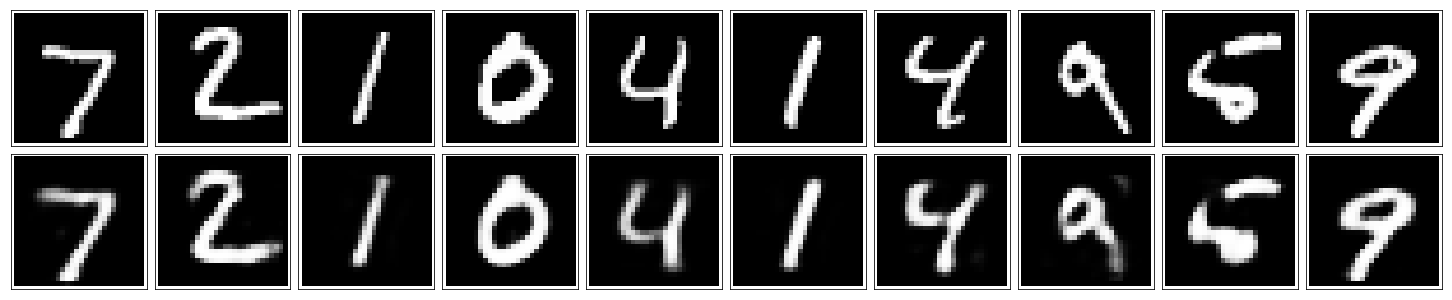

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [8]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.